In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/car_price_prediction.csv')
data.shape



(19237, 18)

In [ ]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
#  Preprocess data (1)
X = data.drop('Price', axis=1)
Y = data['Price']

# Encode categorical features
categorical_features = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_features])
encoded_cols = encoder.get_feature_names_out(categorical_features)
X_encoded = pd.DataFrame(X_encoded, columns=encoded_cols, index=X.index)

# Concatenate
X = pd.concat([data.drop(categorical_features, axis=1), X_encoded], axis=1)
print(X,Y)


             ID  Price  Prod. year  Cylinders  Airbags  Levy_-  Levy_1011  \
0      45654403  13328        2010        6.0       12     0.0        0.0   
1      44731507  16621        2011        6.0        8     0.0        0.0   
2      45774419   8467        2006        4.0        2     1.0        0.0   
3      45769185   3607        2011        4.0        0     0.0        0.0   
4      45809263  11726        2014        4.0        4     0.0        0.0   
...         ...    ...         ...        ...      ...     ...        ...   
19232  45798355   8467        1999        4.0        5     1.0        0.0   
19233  45778856  15681        2011        4.0        8     0.0        0.0   
19234  45804997  26108        2010        4.0        4     0.0        0.0   
19235  45793526   5331        2007        4.0        4     0.0        0.0   
19236  45813273    470        2012        4.0       12     0.0        0.0   

       Levy_1016  Levy_1017  Levy_1018  ...  Color_Green  Color_Grey  \
0  

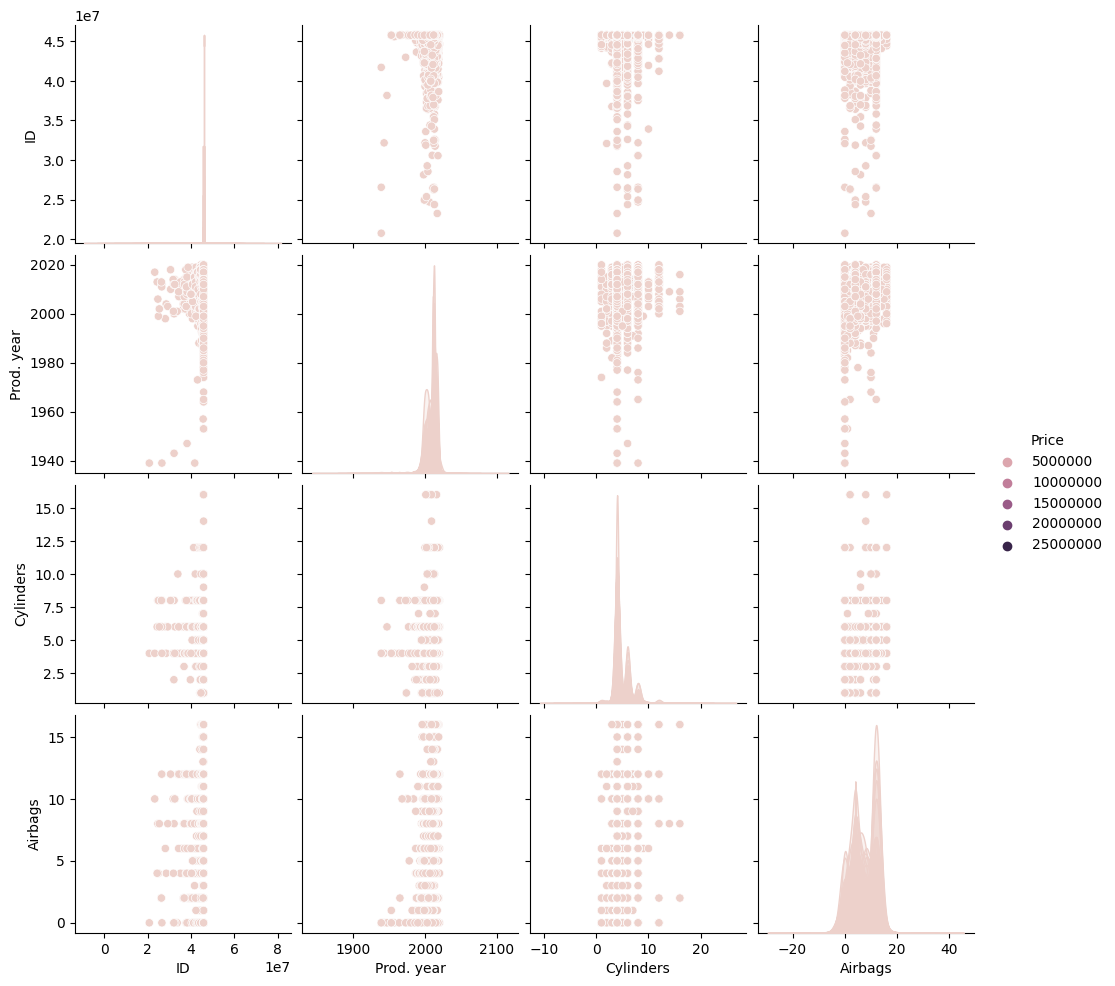

In [ ]:
sns.pairplot(data, hue = 'Price')
plt.show()

In [ ]:
# Split dataset for training and testing (2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape

((15389, 10061), (3848, 10061))

In [ ]:
# Feature Reduction using PCA (3)
n_components = 5
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_test_pca.shape, X_test_pca.shape

((3848, 5), (3848, 5))

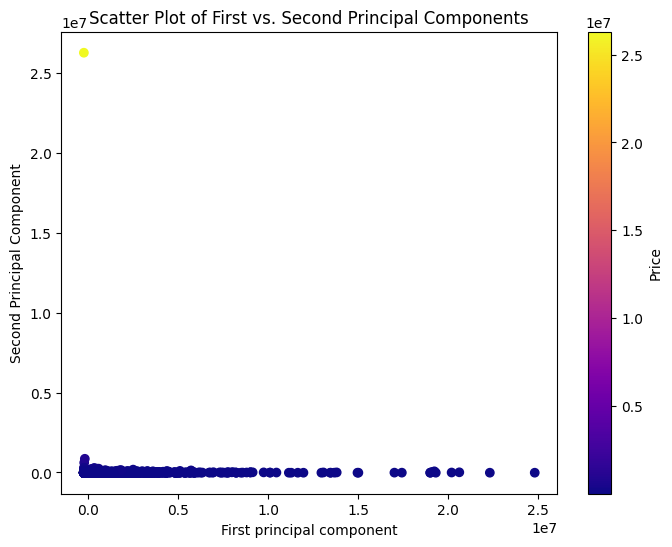

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Scatter Plot of First vs. Second Principal Components')
plt.colorbar(label='Price')  # Use 'Price' as the color bar label
plt.show()

In [ ]:
# Step 4: Train a machine learning model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_pca, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:

# Step 5: Make predictions
Y_prediction = model.predict(X_test_pca)


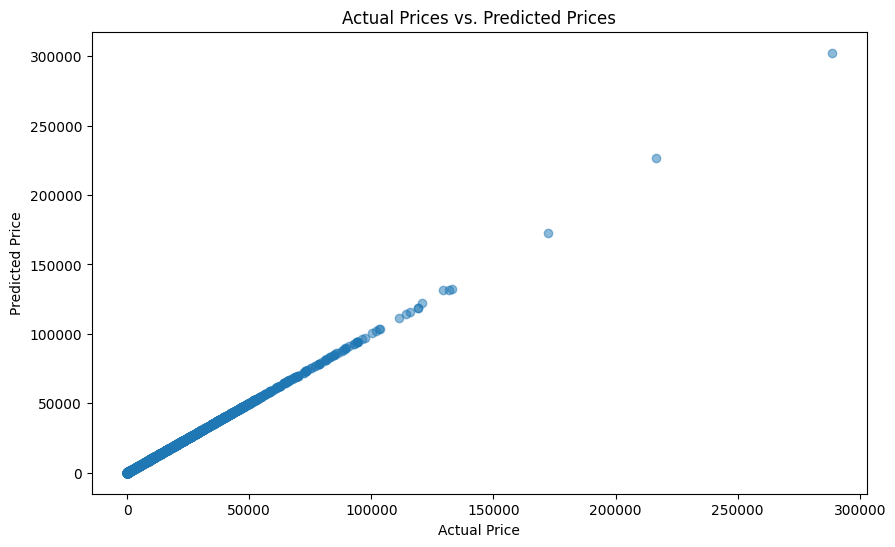

In [ ]:
# For regression, a scatter plot to compare actual vs. predicted values.
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_prediction, alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

In [ ]:
# Step 6: Evaluate the model
mse = mean_squared_error(Y_test, Y_prediction)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 82035.53418131483


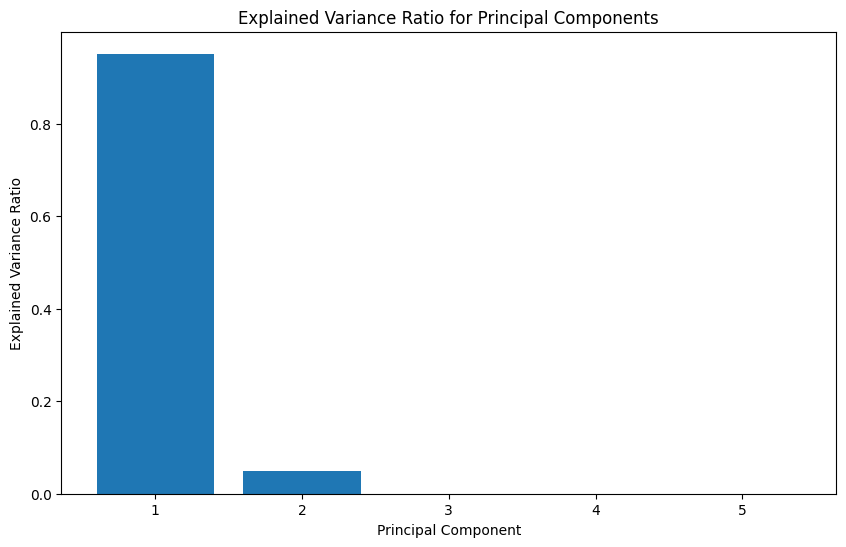

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio for Principal Components")
plt.show()